In [5]:
# C:\Mark\uni\Uni Work\5th Year\Diss\ROC Surfaces\adni_noNA.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib notebook

# Alzheimers Data - Trinormal

In [6]:
df = pd.read_csv('C:\\Mark\\uni\\Uni Work\\5th Year\\Diss\\ROC Surfaces\\adni_noNA.csv')
df

,Unnamed: 0,RID,APOE4,MMSE,age,gender,educ,DX,abeta,tau,LeftHipp,RightHipp,Hipp,HCI
0,1,2002,0,28,65,1,16,2,293,254,3.919,4.041,7.960,8.5163
1,2,2002,0,28,65,1,16,2,293,254,3.803,4.033,7.836,8.5163
2,3,2010,1,30,63,2,20,2,444,729,4.045,3.957,8.002,4.9071
3,4,2010,1,30,63,2,20,2,444,729,4.001,4.003,8.004,4.9071
4,5,2018,0,29,76,2,18,2,500,559,3.789,3.965,7.754,8.7040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1030,5290,1,29,67,2,12,1,1808,1620,3.782,3.759,7.541,4.9309
1028,1031,5292,0,30,74,2,13,1,1850,1330,3.397,3.705,7.102,6.8485
1029,1032,5295,1,29,75,2,15,1,802,1792,2.657,3.271,5.928,18.9298
1030,1033,5296,0,29,69,1,14,1,270,569,5.140,5.392,10.532,10.1158


In [7]:
d1 = df[df['DX'] == 1]
d2 = df[df['DX'] == 2]
d3 = df[df['DX'] == 3]

In [8]:
def ROCSurface(d1, d2, d3, marker, reverse=False, log=False):
    marker_1 = np.array(d1[marker])
    marker_2 = np.array(d2[marker])
    marker_3 = np.array(d3[marker])
    
    if log:
        marker_1 = np.log(marker_1)
        marker_2 = np.log(marker_2)
        marker_3 = np.log(marker_3)
    
    if reverse:
        marker_1 = [-i for i in marker_1]
        marker_2 = [-i for i in marker_2]
        marker_3 = [-i for i in marker_3]
    
    mu1d, sigma1d = np.mean(marker_1), np.std(marker_1)
    mu2d, sigma2d = np.mean(marker_2), np.std(marker_2)
    mu3d, sigma3d = np.mean(marker_3), np.std(marker_3)
    
    p1 = np.linspace(0,1,100)
    p3 = np.linspace(0,1,100)

    a = (mu3d - mu2d) / sigma2d
    b = sigma3d / sigma2d

    c = (mu1d - mu2d) / sigma2d
    d = sigma1d / sigma2d

    ROCsurface = []
    ROCsurface2 = []

    for i in p1:
        nowlist = []
        nowlist2 = []
        for j in p3:
            rocsurface_here = stats.norm.cdf(a + b * stats.norm.ppf(1-j)) - stats.norm.cdf(c + d * stats.norm.ppf(i))

            if rocsurface_here >=0:
                nowlist.append(rocsurface_here)
                nowlist2.append(rocsurface_here)
            else:
                nowlist.append(0)
                nowlist2.append(np.nan)
        ROCsurface.append(nowlist)
        ROCsurface2.append(nowlist2)
        
    first = [ROCsurface[i][j] for i in range(100) for j in range(100)]
    VUS = np.nanmean(first)
    
    #ROCsurface2 = [np.nan if i == 0 else i for i in ROCsurface[j] for j in range(100)]
    
    return p1, ROCsurface, p3, VUS, ROCsurface2

## Tau

In [9]:
marker = 'tau'

x, Y, z, VUS, Y2 = ROCSurface(d1, d2, d3, marker, log=True) 

<IPython.core.display.Javascript object>


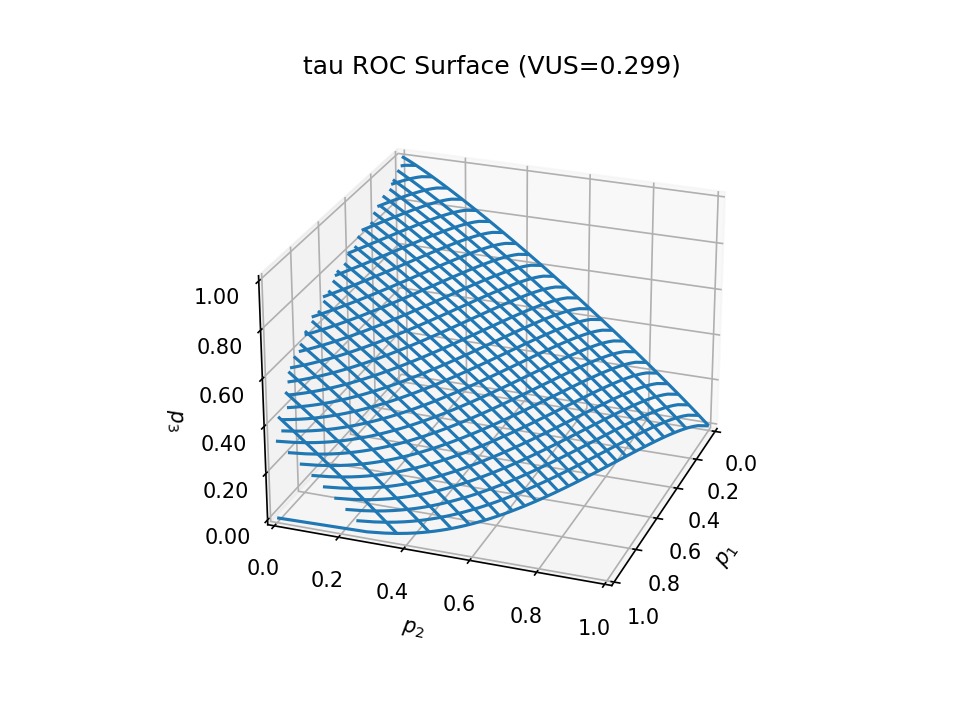

In [10]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X, Z = np.meshgrid(x, z)

surf = ax.plot_wireframe(X, Y2, Z, rstride= 4, cstride=4)

ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_title(f"{marker} ROC Surface (VUS={round(VUS, 3)})")

ax.set_xlabel("$p_1$")
ax.set_xlim(0,1)

ax.set_ylabel("$p_2$")
ax.set_ylim(0,1)

ax.set_zlabel("$p_3$")
ax.set_zlim(0,1)

ax.view_init(elev=25, azim=20)

plt.show()

## Abeta

<IPython.core.display.Javascript object>


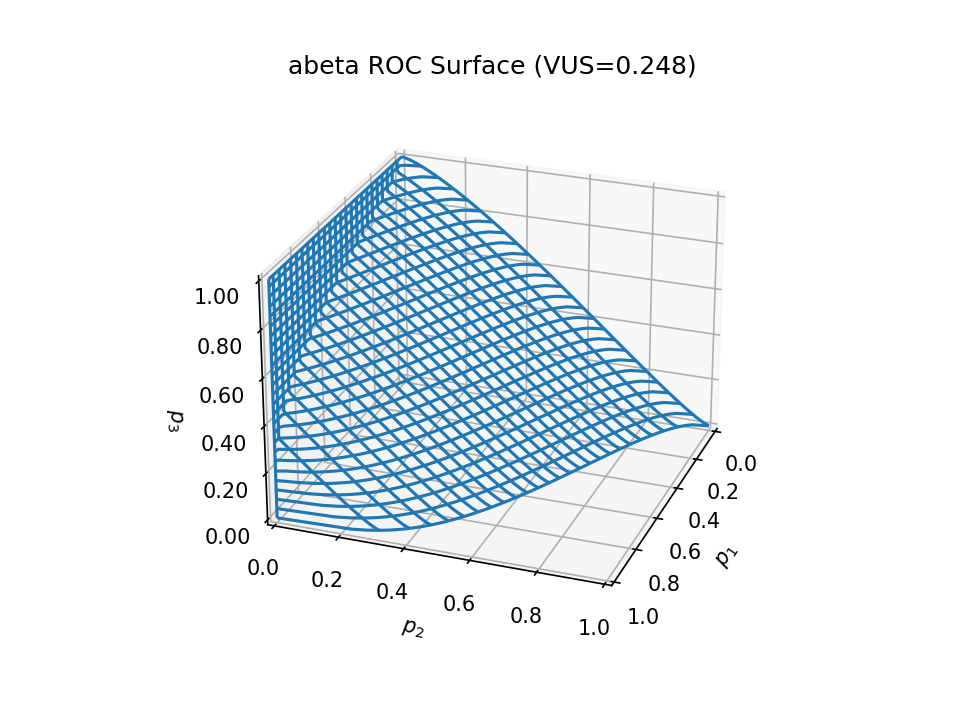

In [11]:
marker = 'abeta'

x, Y, z, VUS, Y2 = ROCSurface(d1, d2, d3, marker, log=True) 

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X, Z = np.meshgrid(x, z)

surf = ax.plot_wireframe(X, Y, Z, rstride= 4, cstride=4)

ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_title(f"{marker} ROC Surface (VUS={round(VUS, 3)})")

ax.set_xlabel("$p_1$")
ax.set_xlim(0,1)

ax.set_ylabel("$p_2$")
ax.set_ylim(0,1)

ax.set_zlabel("$p_3$")
ax.set_zlim(0,1)

ax.view_init(elev=25, azim=20)

plt.show()

## Hipp

<IPython.core.display.Javascript object>


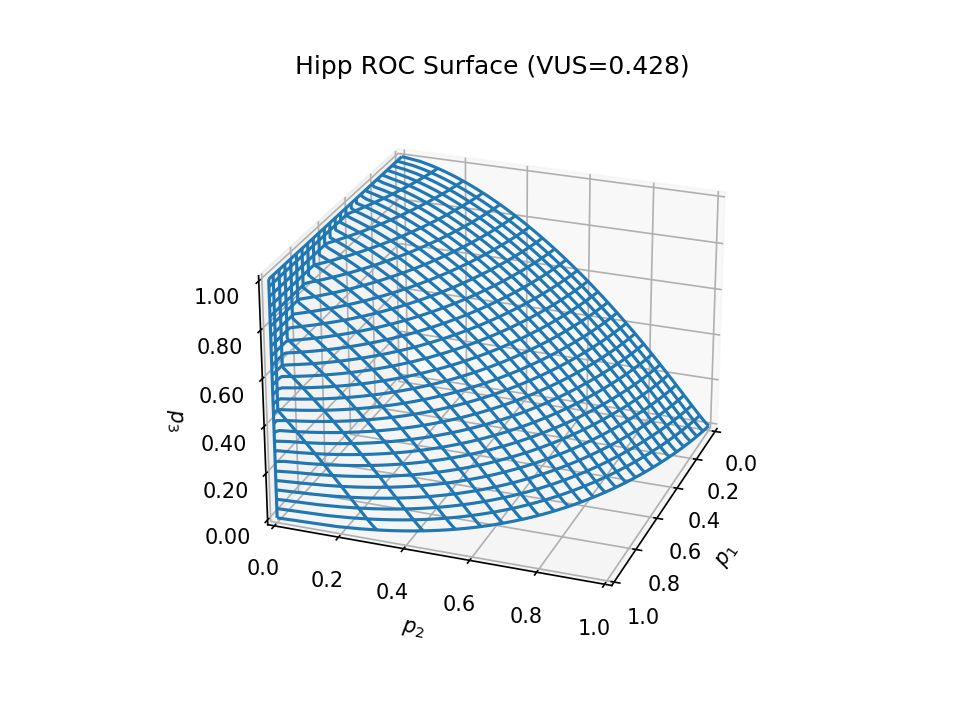

In [12]:
marker = 'Hipp'

x, Y, z, VUS, Y2 = ROCSurface(d1, d2, d3, marker, reverse=True) 

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X, Z = np.meshgrid(x, z)

surf = ax.plot_wireframe(X, Y, Z, rstride= 4, cstride=4)

ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_title(f"{marker} ROC Surface (VUS={round(VUS, 3)})")

ax.set_xlabel("$p_1$")
ax.set_xlim(0,1)

ax.set_ylabel("$p_2$")
ax.set_ylim(0,1)

ax.set_zlabel("$p_3$")
ax.set_zlim(0,1)

ax.view_init(elev=25, azim=20)

plt.show()

## HCI

<IPython.core.display.Javascript object>


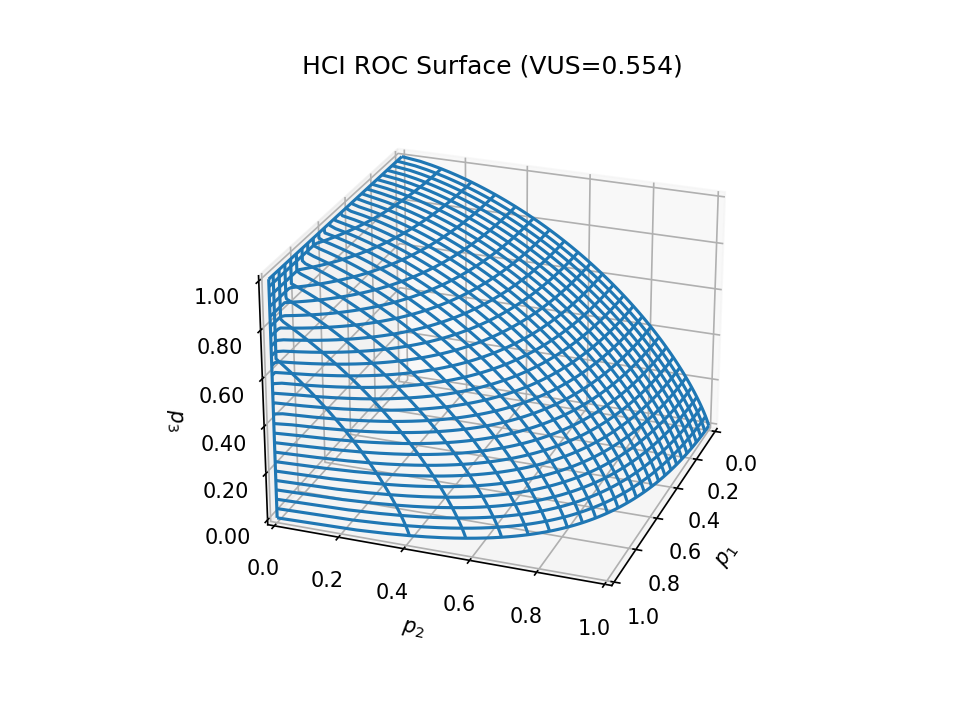

In [13]:
marker = 'HCI'

x, Y, z, VUS, Y2 = ROCSurface(d1, d2, d3, marker, log=True) 

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X, Z = np.meshgrid(x, z)

surf = ax.plot_wireframe(X, Y, Z, rstride= 4, cstride=4)

ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_title(f"{marker} ROC Surface (VUS={round(VUS, 3)})")

ax.set_xlabel("$p_1$")
ax.set_xlim(0,1)

ax.set_ylabel("$p_2$")
ax.set_ylim(0,1)

ax.set_zlabel("$p_3$")
ax.set_zlim(0,1)

ax.view_init(elev=25, azim=20)

plt.show()

# Old Code

In [4]:
abeta1 = np.array(d1['abeta'])
abeta2 = np.array(d2['abeta'])
abeta3 = np.array(d3['abeta'])

In [5]:
mu1d, sigma1d = np.mean(abeta1), np.std(abeta1)
mu2d, sigma2d = np.mean(abeta2), np.std(abeta2)
mu3d, sigma3d = np.mean(abeta3), np.std(abeta3)

In [7]:
import scipy.stats as stats

p1 = np.linspace(0,1,100)
p3 = np.linspace(0,1,100)

a = (mu3d - mu2d) / sigma2d
b = sigma3d / sigma2d

c = (mu1d - mu2d) / sigma2d
d = sigma1d / sigma2d

ROCsurface = []

for i in p1:
    nowlist = []
    for j in p3:
        rocsurface_here = stats.norm.cdf(a + b * stats.norm.ppf(1-j)) - stats.norm.cdf(c + d * stats.norm.ppf(i))
        
        if rocsurface_here >=0:
            nowlist.append(rocsurface_here)
        else:
            nowlist.append(0)
    ROCsurface.append(nowlist)

In [8]:
first = [ROCsurface[i][j] for i in range(100) for j in range(100)]
np.nanmean(first)

0.2540362096734783

<IPython.core.display.Javascript object>


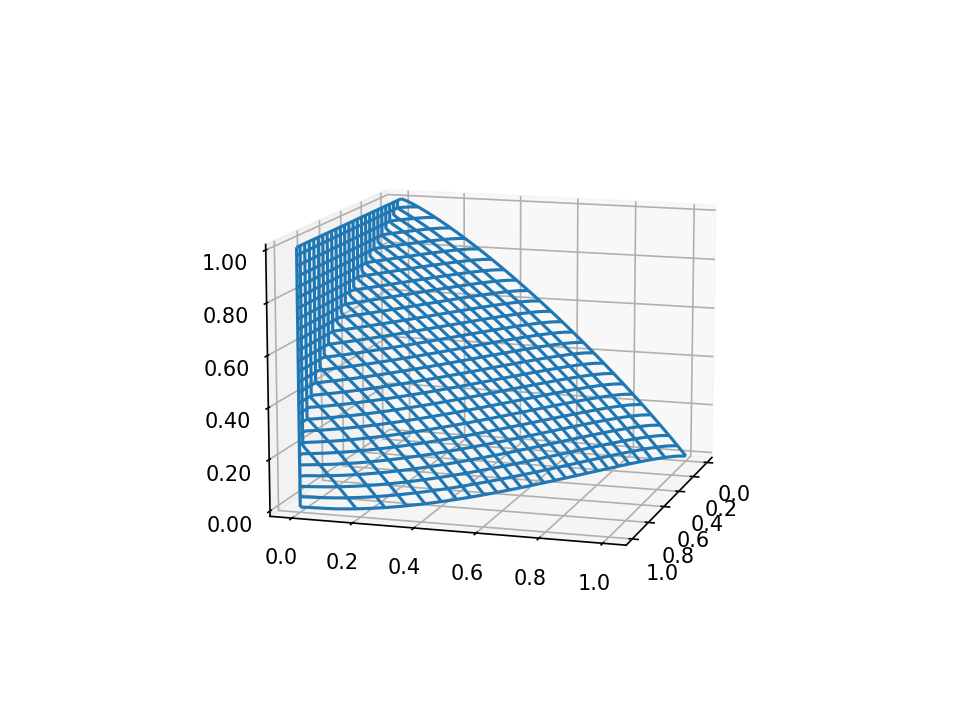

In [14]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X, Z = np.meshgrid(p1, p3)

# Plot the wireframe.
surf = ax.plot_wireframe(X, ROCsurface, Z, rstride= 4, cstride=4)#,linestyle='dashed')

# Plot the surface
#surf = ax.plot_surface(X, ROCsurface, Z,cmap='Greens')

# Plot the surface
#surf = ax.scatter(X, ROCsurface, Z, marker = '.')

ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Bootstrapping

In [14]:
import pandas as pd

def BootstrapSurface(marker, n, df, log=False, reverse=False):
    data_len = df.shape[0]

    VUSs = []
    
    for i in range(n):
        
        if i % 10 ==0:
            print(f'{i}/{n} completed')
            
        random_data = df.sample(n=data_len, replace=True)

        d1 = random_data[random_data['DX'] == 1]
        d2 = random_data[random_data['DX'] == 2]
        d3 = random_data[random_data['DX'] == 3]

        x, Y, z, VUS, Y2 = ROCSurface(d1, d2, d3, marker, log=log, reverse=reverse)

        VUSs.append(VUS)
        
    print(f'97.5% CI: {round(stats.mstats.mquantiles(VUSs,0.975)[0],4)}')
    print(f'2.5% CI: {round(stats.mstats.mquantiles(VUSs,0.025)[0],4)}')

In [15]:
df = pd.read_csv('C:\\Mark\\uni\\Uni Work\\5th Year\\Diss\\ROC Surfaces\\adni_noNA.csv')

BootstrapSurface('Hipp', 100, df, reverse=True)

0/100 completed
10/100 completed
20/100 completed
30/100 completed
40/100 completed
50/100 completed
60/100 completed
70/100 completed
80/100 completed
90/100 completed
97.5% CI: 0.466
2.5% CI: 0.4011


In [16]:
df = pd.read_csv('C:\\Mark\\uni\\Uni Work\\5th Year\\Diss\\ROC Surfaces\\adni_noNA.csv')

BootstrapSurface('HCI', 100, df)

0/100 completed
10/100 completed
20/100 completed
30/100 completed
40/100 completed
50/100 completed
60/100 completed
70/100 completed
80/100 completed
90/100 completed
97.5% CI: 0.583
2.5% CI: 0.512


# Check Normality Assumptions of Data

In [6]:
df = pd.read_csv('C:\\Mark\\uni\\Uni Work\\5th Year\\Diss\\ROC Surfaces\\adni_noNA.csv')
display(df)

d1 = df[df['DX'] == 1]
d2 = df[df['DX'] == 2]
d3 = df[df['DX'] == 3]

,Unnamed: 0,RID,APOE4,MMSE,age,gender,educ,DX,abeta,tau,LeftHipp,RightHipp,Hipp,HCI
0,1,2002,0,28,65,1,16,2,293,254,3.919,4.041,7.960,8.5163
1,2,2002,0,28,65,1,16,2,293,254,3.803,4.033,7.836,8.5163
2,3,2010,1,30,63,2,20,2,444,729,4.045,3.957,8.002,4.9071
3,4,2010,1,30,63,2,20,2,444,729,4.001,4.003,8.004,4.9071
4,5,2018,0,29,76,2,18,2,500,559,3.789,3.965,7.754,8.7040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1030,5290,1,29,67,2,12,1,1808,1620,3.782,3.759,7.541,4.9309
1028,1031,5292,0,30,74,2,13,1,1850,1330,3.397,3.705,7.102,6.8485
1029,1032,5295,1,29,75,2,15,1,802,1792,2.657,3.271,5.928,18.9298
1030,1033,5296,0,29,69,1,14,1,270,569,5.140,5.392,10.532,10.1158


<IPython.core.display.Javascript object>


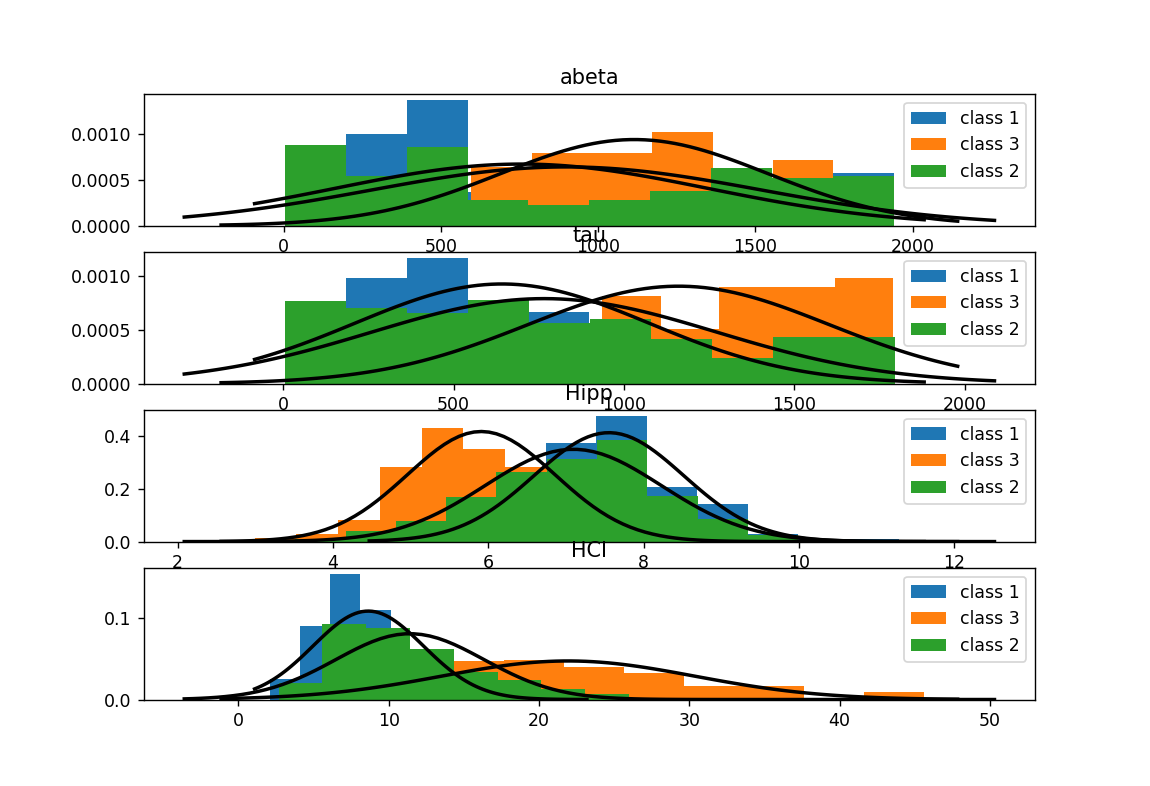

In [6]:
from scipy.stats import norm

def plot_hist(df, marker_list, log=False, square=False):
    fig, ax = plt.subplots(len(marker_list),1)
    count = 0
    
    for marker in marker_list:
        d1 = df[df['DX'] == 1]
        d2 = df[df['DX'] == 2]
        d3 = df[df['DX'] == 3]
        
        if log:
            toplotd1 = np.log(d1[marker])
            toplotd2 = np.log(d2[marker])
            toplotd3 = np.log(d3[marker])
        elif square:
            toplotd1 = np.sqrt(d1[marker])
            toplotd2 = np.sqrt(d2[marker])
            toplotd3 = np.sqrt(d3[marker])
        else:
            toplotd1 = d1[marker]
            toplotd2 = d2[marker]
            toplotd3 = d3[marker]
            
        mu1d, sigma1d = np.mean(toplotd1), np.std(toplotd1)
        mu2d, sigma2d = np.mean(toplotd2), np.std(toplotd2)
        mu3d, sigma3d = np.mean(toplotd3), np.std(toplotd3)
        
        ax[count].hist(toplotd1, density=True, label='class 1')
        xmin, xmax = ax[count].get_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, (mu1d), (sigma1d))
        ax[count].plot(x, p, 'k', linewidth=2)
    
        ax[count].hist(toplotd3, density=True, label='class 3')
        xmin, xmax = ax[count].get_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, (mu3d), (sigma3d))
        ax[count].plot(x, p, 'k', linewidth=2)
        
        ax[count].hist(toplotd2, density=True, label='class 2')
        xmin, xmax = ax[count].get_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, (mu2d), (sigma2d))
        ax[count].plot(x, p, 'k', linewidth=2) 
        
        ax[count].set_title(marker)
        ax[count].legend()
        
        count += 1
        
plot_hist(df, ['abeta', 'tau', 'Hipp', 'HCI'], log=False)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


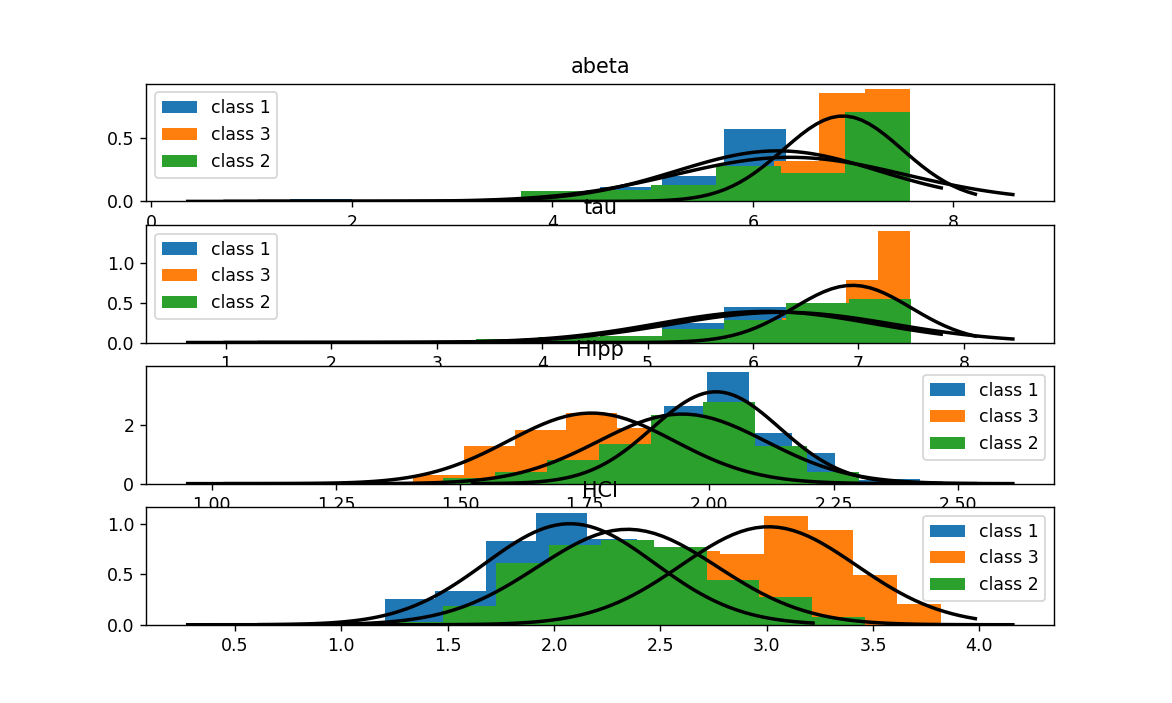

In [7]:
plot_hist(df, ['abeta', 'tau', 'Hipp', 'HCI'], log=True, square=False)
plt.show()

<IPython.core.display.Javascript object>


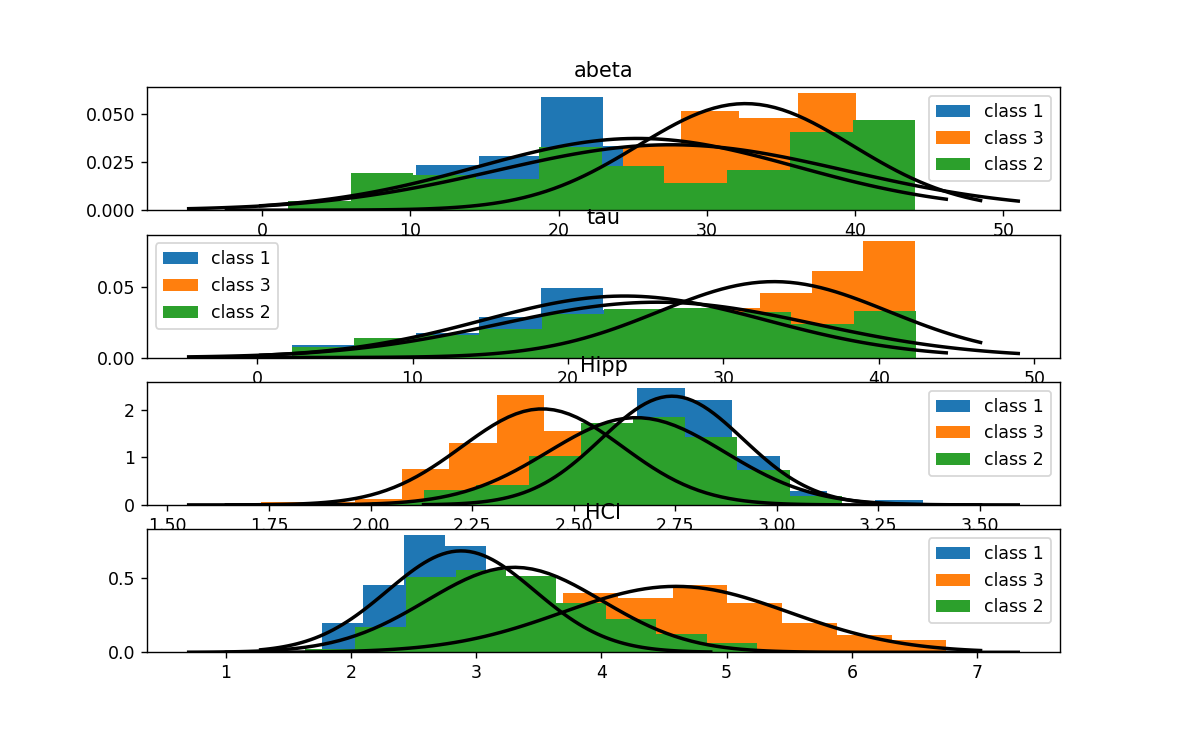

In [8]:
plot_hist(df, ['abeta', 'tau', 'Hipp', 'HCI'], square=True)
plt.show()

We can see that,

Original data

|        | Abeta | Tau | Hipp | HCI |
| ---    | --- | --- | --- | --- |
| Class1 |   Y  |  N   |  Y   |  Y   |
| Class2 |   N  |  N   |  Y   |   Y  |
| Class3 |   M  |  N   |  Y   |   Y  |

Log data

|        | Abeta | Tau | Hipp | HCI |
| ---    | --- | --- | --- | --- |
| Class1 |  N   |  N   |  Y   |   Y  |
| Class2 |  N   |  N   |  Y   |   Y  |
| Class3 |  Y   |  Y   |  Y   |   Y  |

In [ ]:
fig:AlzheimerAgeScatter



